## Duplicating Service Data Analysis

<img src="csueb.png" style="width:2px;heigth:1px"/>

This project is done to visualize and understand the sales and revenue of the duplicating services at California State University, East Bay. I work there as a part time student technician and inventory analyst.

This file will contain **EDA, Data Cleaning, Data Visualizing, and Summary to improve the sales**

The benefit: The reason I have done this is to make the work life smoother whenever there is high demand/rush period where we would be able to run this place efficiently and gain much better revenue for the Cal State East Bay. This data cannot be shared, however I did get the permission to use this for my project, and so here it is! 

The Dataset contains history of sales from Jan 2019 to June 2019, with its features such as the departments, account number, funds, jub number, amount.

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from sklearn import preprocessing

In [2]:
df = pd.read_csv('duplicatingservice.csv')

In [3]:
df.head()

,ACCOUNT,FUND,DEPT ID,PROGRM,CLASS,PRO/GRT,JOB #,AMOUNT,DEPT,month
0,660002.0,EB001,12200.0,NaN,NaN,NaN,960,$99.00,CHEMISTRY,jan
1,660811.0,EB001,14550.0,NaN,NaN,NaN,DGNTV,$40.50,COUNSELING,jan
2,660811.0,EB001,12500.0,NaN,NaN,NaN,961,$42.00,PSYCHOLOGY,jan
3,660811.0,EB001,12500.0,NaN,NaN,NaN,962,$42.00,PSYCHOLOGY,jan
4,660811.0,EB001,12500.0,NaN,NaN,NaN,963,$47.25,PSYCHOLOGY,jan


### Data Cleaning

In [4]:
df.drop(columns=['JOB #','PRO/GRT','ACCOUNT','FUND', 'CLASS','PROGRM'], axis=1, inplace = True)

In [5]:
df = df.rename(index =str, columns={'DEPT ID': 'dept_id', ' AMOUNT ':'amount', 'DEPT':'department'})

In [6]:
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('-','_')
df.columns = df.columns.str.rstrip()
df.columns = df.columns.str.lstrip()
df.columns = df.columns.str.replace('/','_')

In [7]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df["dept_id"] = LE.fit_transform(df["dept_id"])
df["dept_id"].unique()

array([ 41,  94,  49,  93, 112,  91,  58, 100,  40,  72,  70,  35, 105,
        82,  77,  86,  89, 113,  28,  12,  43,  14,  74, 114,  83,  47,
        55, 123, 121,  13,  60,  85,  45,  26,  67,  20, 111,  90,  11,
        17,  44,  25,  46,  87,  21,  48, 107,  59, 104,  38,  65,  18,
        50,  31,  73,  37,  54, 119,  68, 127,  79, 126,  52,   3,   0,
       103,  29, 110,  34,  16, 109,  36, 122,  75,  71,  56,  10,  15,
        78,  32,   7,  30,  97,  42, 115,   8,   6,  63,  96, 101,  66,
        39, 120,  64, 118, 125,  27, 117,   1,   5, 124,  19,   2,  62,
        57,  51,  22,   4,  23,  53,  69,  92,  84,  98,  33, 106,  99,
        24, 116, 102,  76,  80, 108,  95,  81,   9,  88,  61])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2657 entries, 0 to 2656
Data columns (total 4 columns):
dept_id       2657 non-null int64
amount        2657 non-null object
department    2657 non-null object
month         2657 non-null object
dtypes: int64(1), object(3)
memory usage: 103.8+ KB


In [9]:
df.amount = df.amount.str.replace('$','')

In [10]:
df.amount.unique()

array(['99.00 ', '40.50 ', '42.00 ', '47.25 ', '29.25 ', '26.00 ',
       '5.00 ', '6.50 ', '15.00 ', '10.50 ', '8.00 ', '80.50 ', '5.50 ',
       '6.25 ', '126.50 ', '57.00 ', '14.00 ', '16.00 ', '20.00 ',
       '8.75 ', '48.50 ', '400.50 ', '27.50 ', '260.50 ', '4.80 ',
       '16.50 ', '8.25 ', '24.75 ', '22.00 ', '4.00 ', '10.56 ', '20.10 ',
       '23.00 ', '145.50 ', '45.50 ', '29.30 ', '17.60 ', '12.50 ',
       '5.25 ', '394.68 ', '3.50 ', '43.00 ', '10.00 ', '22.50 ',
       '20.50 ', '9.00 ', '72.86 ', '80.00 ', '145.00 ', '6.00 ',
       '95.06 ', '137.00 ', '79.50 ', '36.50 ', '1.75 ', '6.75 ',
       '13.00 ', '520.50 ', '50.00 ', '38.00 ', '130.50 ', '4.50 ',
       '4.65 ', '320.50 ', '19.00 ', '30.00 ', '0.80 ', '78.50 ',
       '125.00 ', '15.64 ', '391.06 ', '7.50 ', '24.50 ', '14.50 ',
       '7.70 ', '3.70 ', '11.75 ', '540.50 ', '30.74 ', '141.62 ',
       '55.00 ', '25.50 ', '275.00 ', '4.40 ', '2.45 ', '2.70 ',
       '540.00 ', '60.50 ', '480.50 ', '4.30 ', '5.

In [11]:
# Changing variables to integers
month = {"month": {"jan":1, "feb":2, "mar":3, "apr":4, "may":5, "jun":6,} }

In [12]:
df.replace(month, inplace= True)

In [13]:
df.month.dropna
df.month.unique()

array([1, 2, 3, 4, 5, 6])

In [14]:
df.amount.dropna(inplace = True)
df.month = pd.to_numeric(df["month"], errors='coerce')
df.amount = pd.to_numeric(df["amount"], errors='coerce')

In [15]:
df.head()

,dept_id,amount,department,month
0,41,99.00,CHEMISTRY,1
1,94,40.50,COUNSELING,1
2,49,42.00,PSYCHOLOGY,1
3,49,42.00,PSYCHOLOGY,1
4,49,47.25,PSYCHOLOGY,1


## Data Visualization

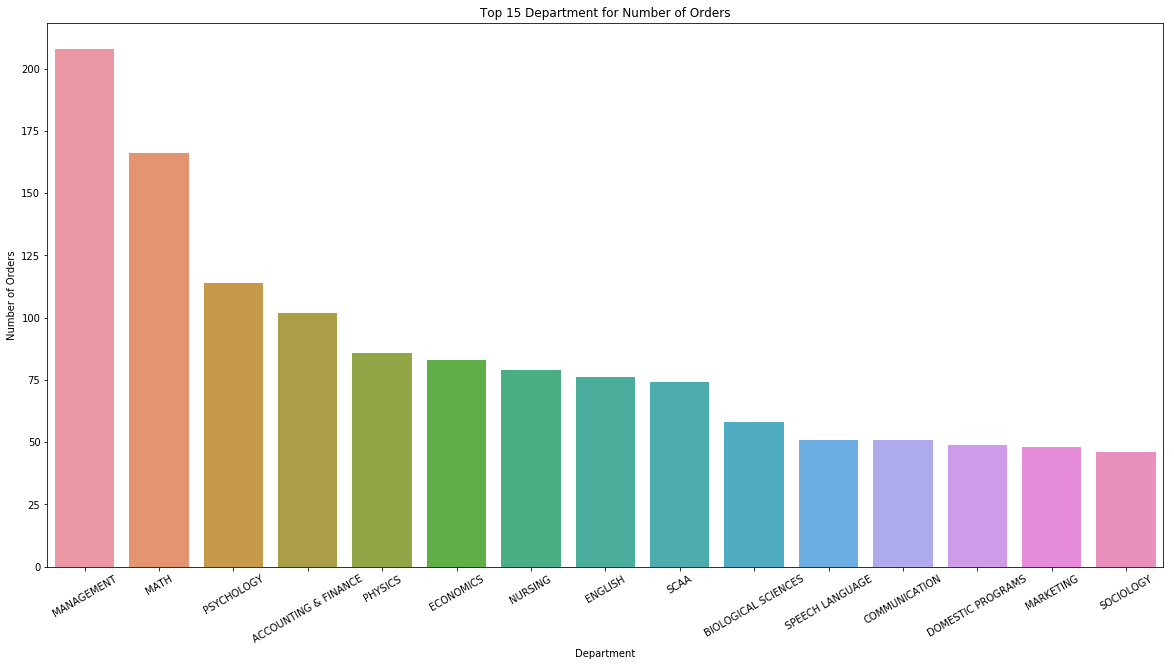

In [16]:
plt.figure(figsize=(20,10))

sns.barplot(x=df['department'].value_counts().nlargest(15).index, 
            y=df['department'].value_counts().nlargest(15))

plt.xticks(rotation=30)
plt.title('Top 15 Department for Number of Orders')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.show()

We could see that Management department has placed the highest orders compared to the other orders during Fall 2019. Followed by Math. This is mainly because of the high student count present in those particular departments where they will come to the duplicating services for printing exams papers, posters and other stuff.

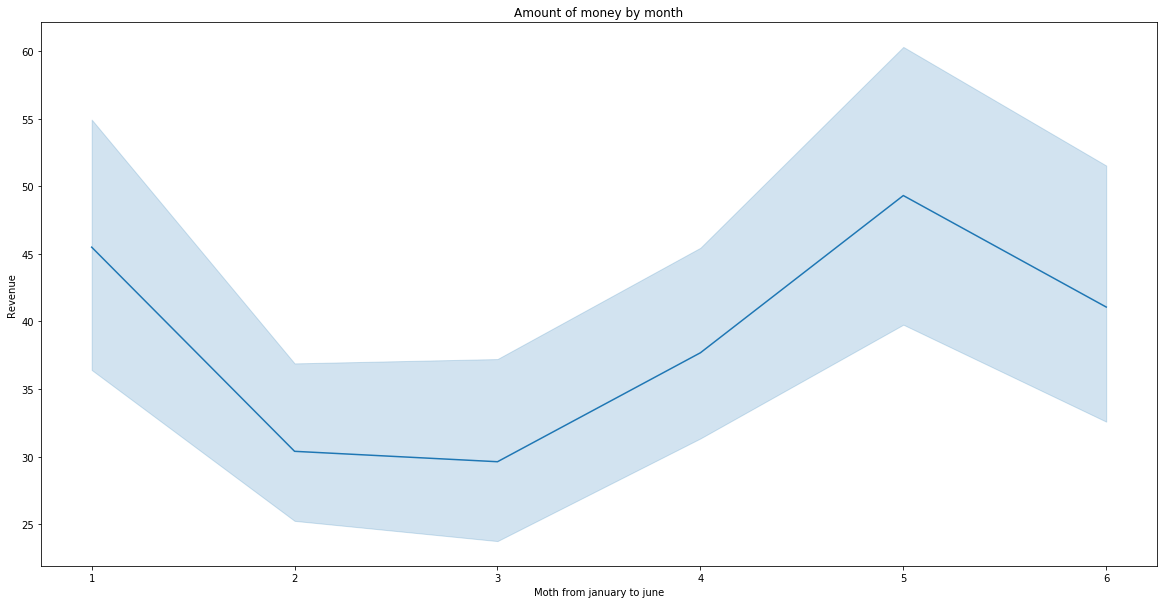

In [17]:
plt.figure(figsize=(20,10))

sns.lineplot(x='month', 
             y='amount', 
             data=df)

plt.title('Amount of money by month')
plt.xlabel('Moth from january to june')
plt.ylabel('Revenue')
plt.show()

It is interesting to see a down fall from february to march. This could be because of less mid-terms and campus events. During the month of May, we witnessed the highest sale. This is because of the final exams, campus events, poster presentations, etc. where students come to us for printing and formatting their projects.

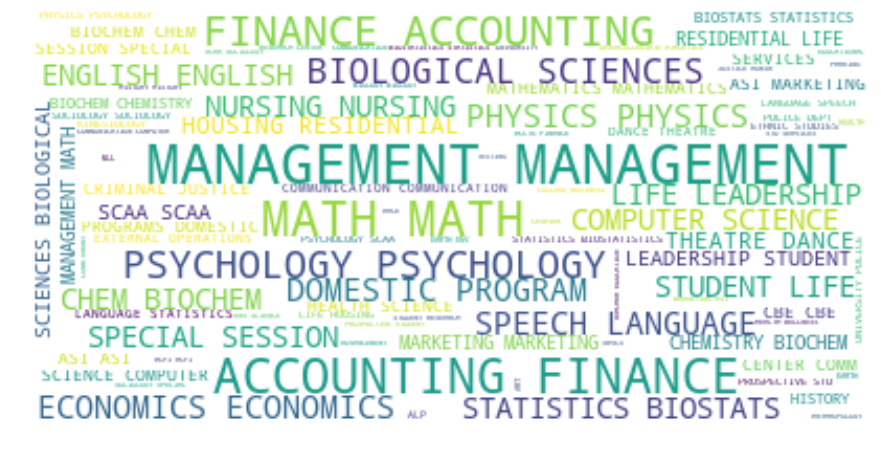

In [18]:
from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(" ".join(df["department"]))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

### So Management and Math were the top two departments that stood out amongst all other departments in terms of sales and purchase orders.

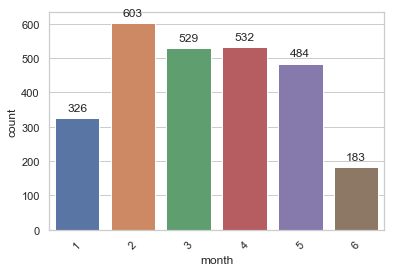

In [19]:
df['month'].value_counts()

import seaborn as sns

sns.set(style="whitegrid")
splot = sns.countplot(x="month",data=df[['month']])
plt.xticks(rotation = 45)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., 
                    p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

It is evident that february had the highest number of orders placed, however the revenue collected from february is not as big as revenue collected in May.

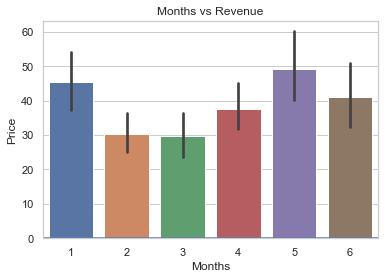

In [20]:
## Barplot of Rating and Content Rating
sns.barplot(df.month, df.amount)
plt.xlabel('Months')
plt.ylabel('Price')
plt.axhline(y=0)
plt.title('Months vs Revenue')
plt.show()

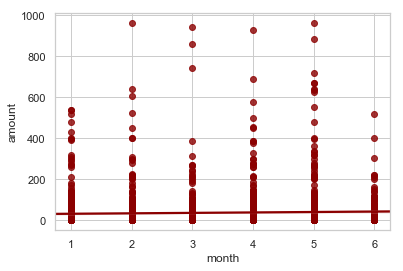

In [21]:
sns.regplot(x='month', y='amount', color = 'darkred', data= df)
plt.show()

We are able to see few orders that were nearly as much as $1000.

### Revenue for each month

In [22]:
revenue =[]
for i in df.month.unique():
    revenue_= df[df['month']==i]['amount'].sum()
    revenue.append(revenue_)

In [23]:
revenue = np.round(revenue,2)

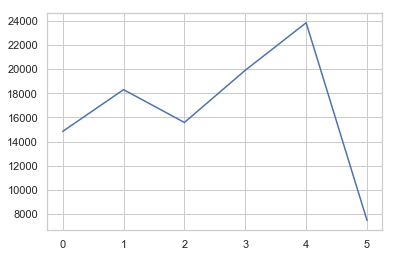

In [24]:
plt.plot(revenue)

In [25]:
revenue

array([14834.22, 18290.89, 15576.5 , 19896.16, 23824.81,  7474.53])

Let's Visualize using the iplot's interactive plots for better understanding and knowledge of the amount received grouped by months!

In [26]:
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import cufflinks as cf
cf.go_offline()

grouped = df.pivot_table(values = 'amount', index = 'month', aggfunc = np.mean)
Rating_Category = grouped.sort_values(by = 'amount', ascending = False)
Rating_Category_head = Rating_Category.head(40)
Rating_Category_head
Rating_Category_head.iplot(kind = 'bar', color = 'green') 

In [27]:
most_avail = df["department"].value_counts()
most_avail = most_avail.to_frame(name = "Count")
most_avail['department'] = most_avail.index
most_avail.set_index("department")
most_avail = most_avail[:15]
most_avail.iplot(kind='pie', labels= "department", values='Count', color = ["red","blue","green","cyan","magenta","yellow","black","pink","burlywood","chartreuse","grey","brown","orangered","gold","papayawhip"], hoverinfo="label+percent+name", hole=0.3)

Now lets build a regression model to predict price.

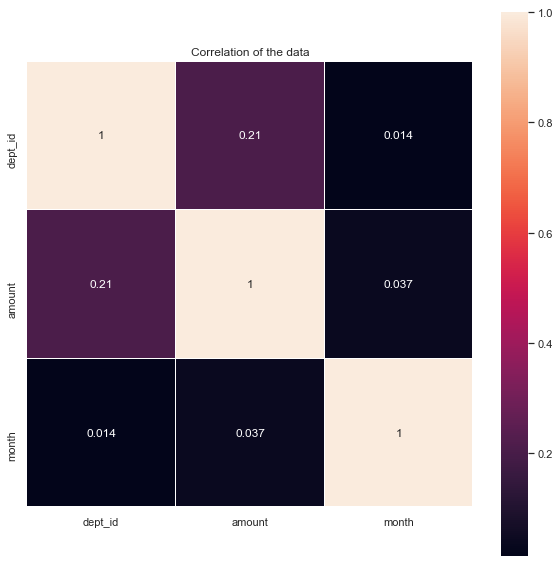

In [28]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), square=True, annot=True, linewidths=.5)
plt.title("Correlation of the data")
plt.show()

amount     1.000000
dept_id    0.208953
month      0.037285
Name: amount, dtype: float64


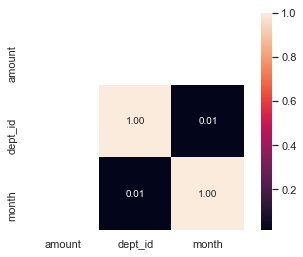

In [29]:
target = 'amount'
no_cols = 4
corrmat = df.corr()
print (corrmat.nlargest(no_cols, target)[target])

cols = corrmat.nlargest(no_cols, target)[target].index
cm = np.corrcoef(df[cols].values.T)

hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## Summary

There highest orders placed are during the start of the fall and end of the fall term. So the necessary action must be taken, such as keeping the labor and machinary well equiped, keeping the inventory well organized for handling this period. The two of the most frequent customers are from the Management and Mathematics departments, so their work must be given importance and keep the sales going strong. 

In [30]:
df.department = pd.get_dummies(df['department'])

In [31]:
#Assigning my x and y

X = df.drop(columns='amount')
y = df.amount

In [32]:
y.fillna(y.mean(), inplace = True)

In [33]:
# Split the data into 80% training and 20% testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [34]:
import statsmodels.api as sm
X_train = sm.add_constant(x_train)

/Users/sajithgowthaman/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



### Linear Regression

In [35]:
# We fit an OLS model using statsmodels
results = sm.OLS(y_train, x_train).fit()

# We print the summary results
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                 amount   R-squared (uncentered):                   0.201
Model:                            OLS   Adj. R-squared (uncentered):              0.200
Method:                 Least Squares   F-statistic:                              178.1
Date:                Thu, 05 Mar 2020   Prob (F-statistic):                   5.27e-103
Time:                        08:55:35   Log-Likelihood:                         -12409.
No. Observations:                2125   AIC:                                  2.482e+04
Df Residuals:                    2122   BIC:                                  2.484e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Now let's predict the price using the history of amount we have!

In [36]:
# We add constant to the model as it's a best practice
# to do so every time!
X_test = sm.add_constant(x_test)

# We are making predictions here
y_preds1 = results.predict(x_test)
print(y_preds1)

544     14.018917
1266    36.486059
2347    41.230366
1497    64.517968
1329    25.356527
          ...    
142     30.505138
821     19.583683
1478    16.908302
2410    40.612059
2053    17.734687
Length: 532, dtype: float64


### Let's predict price with another linear model, Support Vector Machine

In [37]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1) 
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [38]:
y_preds2 = svr_rbf.predict(x_test)
print(y_preds2)

[  8.86877      6.12499928  18.60008674  48.60020364   6.65995146
  14.1504825   18.29076697  21.15337116 199.19324173   7.40561294
  21.64947247  40.60007697  10.80891199   7.7501555   14.97623042
  12.59931306  16.36364688  16.4000942    9.09993573  67.35456342
 -10.88162519  13.29233132  21.14953245   9.09993573   9.09993573
  22.20433017  21.64974575   4.2995929   17.61460293   7.60035436
 139.71482006  -2.87664007  13.14335859   6.18030173  17.60561884
  52.90042889  11.1000582    9.60026848   9.97990275   7.40561294
  13.10045117  14.10372604  11.1000582   12.89992663   7.30803488
  54.39983285  39.90002298  16.25544767  14.40051732  10.95038215
  10.80891199  54.73164354  12.59931306 114.05004486   6.60016813
  10.95038215  -9.61744377  14.97623042   9.60026848  10.95038215
  36.4945204    6.65995146  34.41965217  40.68169662   7.40561294
  19.10042109  11.42317196   9.09993573   8.15012084  10.4000983
  17.10021726   8.01738774  10.80891199   6.91483894  24.39982482
   8.150120

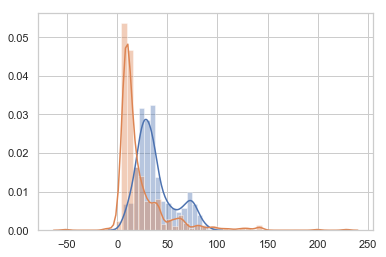

In [39]:
## Visualizing the predictions given by both the models
sns.distplot(y_preds1)
sns.distplot(y_preds2)
plt.show()

The amounts were well predicted, we usually receive jobs that are of the range 0-250. Rarely, we do get orders that are more expensive than that.

## We were able to visualize the sales of the duplicating services at Cal State East Bay. One of the key points to note:
 
  * Prepare your inventory on January and May during the high demand period
  * Stock up on the accessories and printing papers during the rush period again
  * Allocate the required resouces, save energy by utilizing just one copy machine during non rush hours. This is   economical and environmentally helpful by reducing the energy conusmption
  * Hire more student assistants during the month of may
  * Provide discount to management as they have the highest number of order and have been using the duplicating service more than anyone else. 
  * This dataset could be polished with more features for predicting the sales revenue for future purposes using ML Linear model algorithms.

Through this we were able to predict the price that will be gained recorded as the revenue for duplicating services. This can be improved by refering to the visualization summary. The model is not very accurate with the given given data, but the predicted prices were reasonable.